In [2]:
import pandas as pd
import numpy as np

In [3]:
df_final = pd.read_csv('./df_security_concat_9.csv', encoding='cp949')
df_final

,state,city,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,crime_rate,avg_pop_density,mean_hours,mean_days,new_state
0,강원도,정선군,8151609,515.0,4391.0,13.0,0.0271,90.36,427.8,1.62,강원도 정선군
1,강원도,평창군,13399820,190.0,6747.0,46.0,0.0271,90.36,395.8,1.62,강원도 평창군
2,강원도,홍천군,15125927,428.0,1191.0,37.0,0.0271,90.36,388.8,1.54,강원도 홍천군
3,강원도,양구군,1828609,296.0,190.0,22.0,0.0271,90.36,387.2,1.80,강원도 양구군
4,강원도,고성군,11612683,422.0,4391.0,94.0,0.0271,90.36,375.2,1.56,강원도 고성군
...,...,...,...,...,...,...,...,...,...,...,...
73,충청북도,제천시,12125010,979.0,9024.0,314.0,0.0299,219.20,324.8,1.60,충청북도 제천시
74,충청북도,보은군,4737641,316.0,6349.0,99.0,0.0299,219.20,298.2,1.54,충청북도 보은군
75,충청북도,충주시,14797862,1578.0,10600.0,219.0,0.0299,219.20,296.8,1.64,충청북도 충주시
76,충청북도,영동군,4133509,1.0,6076.0,112.0,0.0299,219.20,296.4,1.64,충청북도 영동군


## 변수 중요도 확인을 위한 x, y 데이터 분할 및 Label Encoding 진행

In [6]:
df_final_x = df_final.drop(['state', 'city', 'crime_rate', 'avg_pop_density'], axis =1)
df_final_x

,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,mean_hours,mean_days,new_state
0,8151609,515.0,4391.0,13.0,427.8,1.62,강원도 정선군
1,13399820,190.0,6747.0,46.0,395.8,1.62,강원도 평창군
2,15125927,428.0,1191.0,37.0,388.8,1.54,강원도 홍천군
3,1828609,296.0,190.0,22.0,387.2,1.80,강원도 양구군
4,11612683,422.0,4391.0,94.0,375.2,1.56,강원도 고성군
...,...,...,...,...,...,...,...
73,12125010,979.0,9024.0,314.0,324.8,1.60,충청북도 제천시
74,4737641,316.0,6349.0,99.0,298.2,1.54,충청북도 보은군
75,14797862,1578.0,10600.0,219.0,296.8,1.64,충청북도 충주시
76,4133509,1.0,6076.0,112.0,296.4,1.64,충청북도 영동군


In [10]:
df_final_y = df_final.crime_rate

In [11]:
v_feature_name=df_final_x.columns
v_feature_name

Index(['visit_cnt', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'mean_hours',
       'mean_days', 'new_state'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
qual_col = ['new_state']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(df_final_x[i])
    df_final_x[i] = le.transform(df_final_x[i])
print('Done.')

Done.


## Decision Tree Regreesor를 통한 변수 중요도 확인

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dt_ftimp = DecisionTreeRegressor(random_state=234,)
dt_ftimp.fit(df_final_x, df_final_y)
print("Score on training set: {:.3f}".format(dt_ftimp.score(df_final_x, df_final_y)))

Score on training set: 1.000


In [22]:
from matplotlib import pyplot as plt
plt.rc('font', family='Malgun Gothic')

Text(0, 0.5, '설명변수')

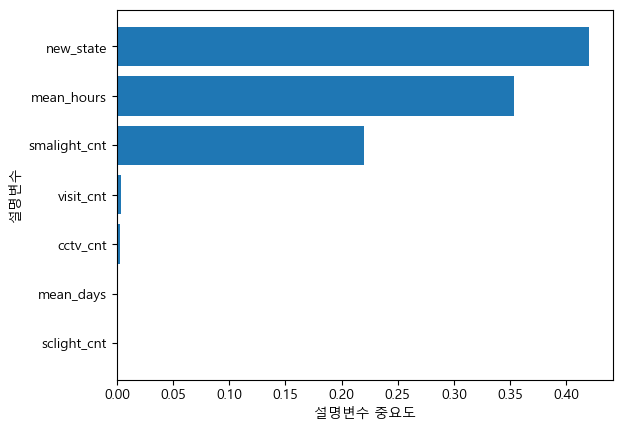

In [23]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = dt_ftimp.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## RandomForestRegressor로 변수 중요도 확인

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_ftimp = RandomForestRegressor(random_state=234,)
rf_ftimp.fit(df_final_x, df_final_y)
print("Score on training set: {:.3f}".format(rf_ftimp.score(df_final_x, df_final_y)))

Score on training set: 0.929


Text(0, 0.5, '설명변수')

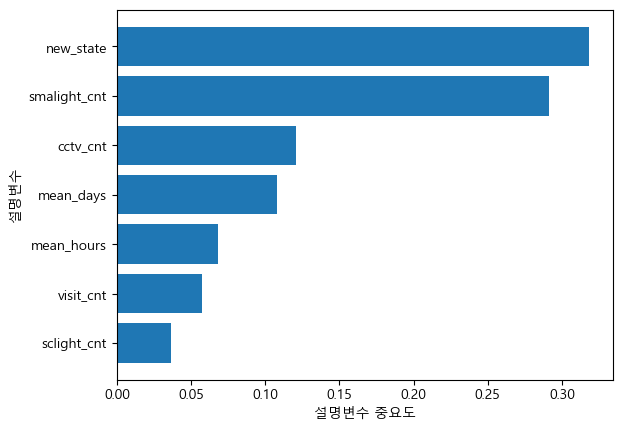

In [26]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_ftimp.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## GradientBoostingRegressor를 통한 변수 중요도 확인

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gb_ftimp = GradientBoostingRegressor(random_state=234,)
gb_ftimp.fit(df_final_x, df_final_y)
print("Score on training set: {:.3f}".format(gb_ftimp.score(df_final_x, df_final_y)))

Score on training set: 0.999


Text(0, 0.5, '설명변수')

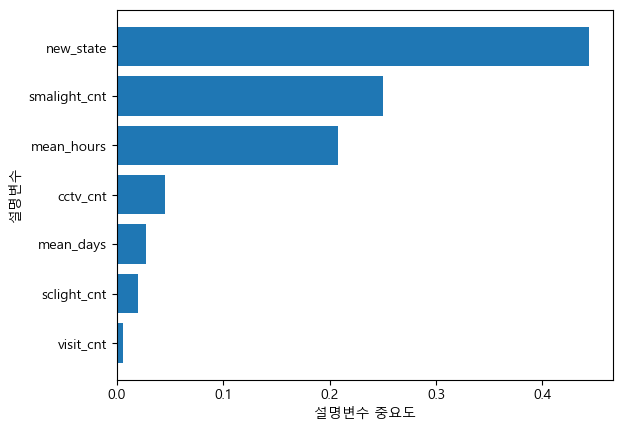

In [29]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_ftimp.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### >> "new_state" (지역) 변수를 추가하니 해당 변수의 중요도가 너무 높음. 해당 변수를 제외하고 나머지 변수들의 중요도를 보기 위해 변수 drop 후 다시 feature_importance 확인

In [37]:
df_drop_state = df_final_x.drop(['new_state'], axis=1)
df_drop_state

,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,mean_hours,mean_days
0,8151609,515.0,4391.0,13.0,427.8,1.62
1,13399820,190.0,6747.0,46.0,395.8,1.62
2,15125927,428.0,1191.0,37.0,388.8,1.54
3,1828609,296.0,190.0,22.0,387.2,1.80
4,11612683,422.0,4391.0,94.0,375.2,1.56
...,...,...,...,...,...,...
73,12125010,979.0,9024.0,314.0,324.8,1.60
74,4737641,316.0,6349.0,99.0,298.2,1.54
75,14797862,1578.0,10600.0,219.0,296.8,1.64
76,4133509,1.0,6076.0,112.0,296.4,1.64


In [47]:
v_feature_name2 = df_drop_state.columns

## new_state 컬럼 drop 후 DecisionTreeRegressor로 변수 중요도 다시 확인

In [48]:
from matplotlib import pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
dt_ftimp2 = DecisionTreeRegressor(random_state=456,)
dt_ftimp2.fit(df_drop_state, df_final_y)
print("Score on training set: {:.3f}".format(dt_ftimp.score(df_drop_state, df_final_y)))

Score on training set: 1.000


Text(0, 0.5, '설명변수')

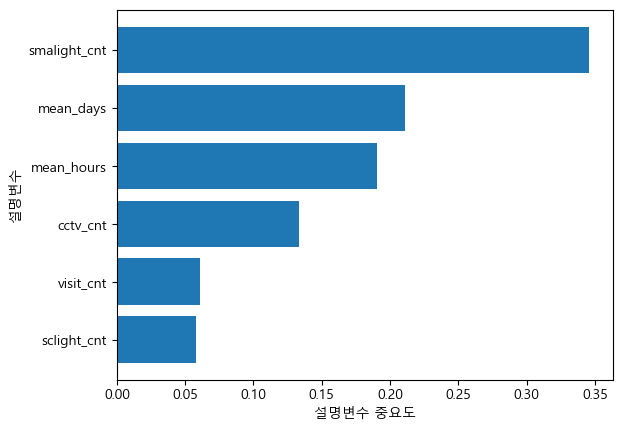

In [52]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name2
df_importance['Importance'] = dt_ftimp2.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## new_state 컬럼 drop 후 RandomForestRegressor로 변수 중요도 다시 확인

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf_ftimp2 = RandomForestRegressor(random_state=456,)
rf_ftimp2.fit(df_drop_state, df_final_y)
print("Score on training set: {:.3f}".format(rf_ftimp2.score(df_drop_state, df_final_y)))

Score on training set: 0.850


Text(0, 0.5, '설명변수')

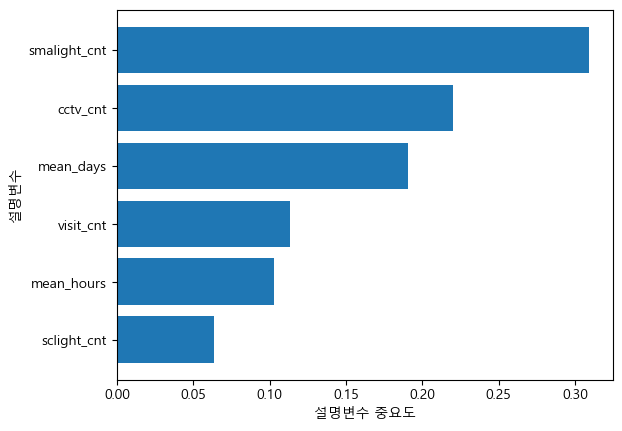

In [55]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name2
df_importance['Importance'] = rf_ftimp2.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## new_state 컬럼 drop 후 GradientBoostingRegressor로 변수 중요도 다시 확인

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gb_ftimp2 = GradientBoostingRegressor(random_state=234,)
gb_ftimp2.fit(df_drop_state, df_final_y)
print("Score on training set: {:.3f}".format(gb_ftimp2.score(df_drop_state, df_final_y)))

Score on training set: 0.988


Text(0, 0.5, '설명변수')

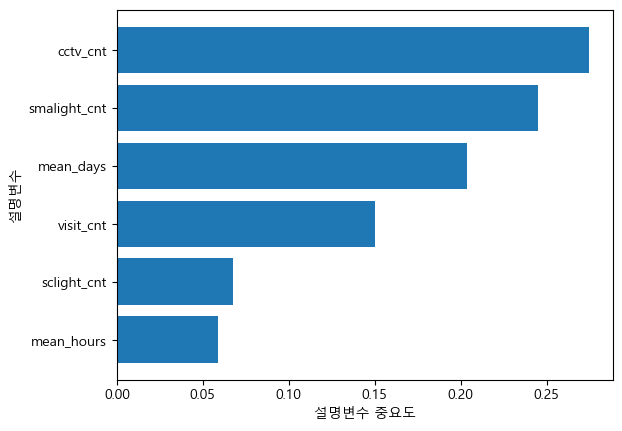

In [58]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name2
df_importance['Importance'] = gb_ftimp2.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')